<a href="https://colab.research.google.com/github/kkamal11/Machine-Learning__MLP/blob/main/Case_Study_2_Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case study 2 - facial recognition**
Our 2nd  case study will be to predict the labels for image data with a popular dataset called
the Labeled Faces in the Wild dataset from the scikit-learn library. The dataset is called
the Olivetti Face dataset and it comprises pictures of famous people's faces, with
appropriate labels. Our task is that of facial recognition, a supervised machine learning
model that is able to predict the name of the person given an image of their face

**Step-1: Load the dataset**

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
# standard python modules
import numpy as np
import matplotlib.pyplot as plt
from time import time

# the olivetti face dataset
from sklearn.datasets import fetch_lfw_people

# feature extraction modules
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# feature scaling module
from sklearn.preprocessing import StandardScaler

# scikit-learn model selection modules
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score
# machine learning modules

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

%matplotlib inline
# this ensures that your plotting will show directly in your jupyter notebook

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)



# Let's inspect the image arrays to find shapes for plotting the images. We can do
#this with the following code:
n_samples, h, w = lfw_people.images.shape
n_samples, h, w

(1288, 50, 37)



 **Step-2: Check the  number of samples are present in  the dataset.**


Now, let's set up the X and y for our machine learning pipeline. We will grab
the data attribute of the lfw_people object:


In [3]:
# for machine learning we use the data directly (as relative pixel positions info is ignored by this model)
X = lfw_people.data
y = lfw_people.target
n_features = X.shape[1]
print(f"#Samples= {X.shape[0]}, #features= {n_features}")

#Samples= 1288, #features= 1850


 **Step 3 : Plot the first image  for visualisation.**

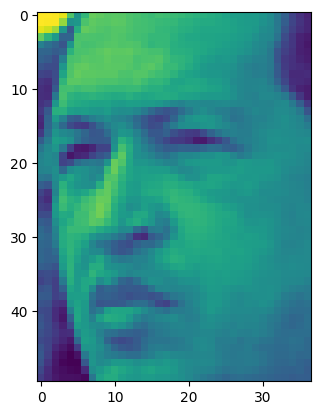

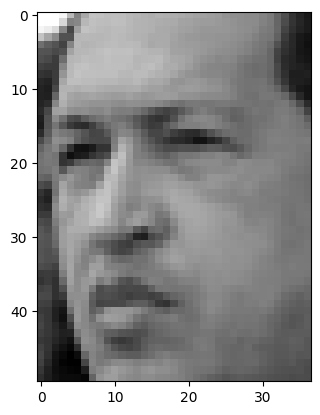

In [4]:
plt.imshow(X[0].reshape((50,37)))
plt.show()
plt.imshow(X[0].reshape((50,37)), cmap=plt.cm.gray)
plt.show()

 **Step 4: Use standard scaler to preprocess the data and visualise first sample again to check if there is any changes in the figure.**

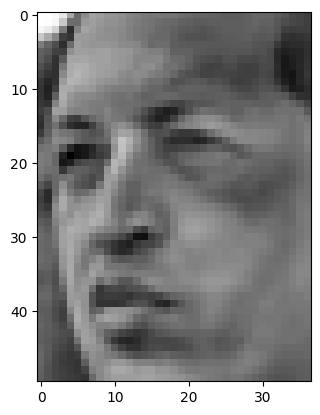

In [5]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X)
plt.imshow(X_tr[0].reshape((50,37)), cmap=plt.cm.gray)
plt.show()

 **Step 5: Let's create train and test dataset by splitting the original data into 3:1 ratio (Keep random state =1).**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

**Step 6: Instantiate the  PCA module  and Create a pipeline having standard scaler and PCA in it.**

In [7]:
pca = PCA()

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

**Step 7: Fit the above pipeline on training data.**

In [8]:
pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

 **Step 8: Try to plot the figure using different number of component and see the changes.**

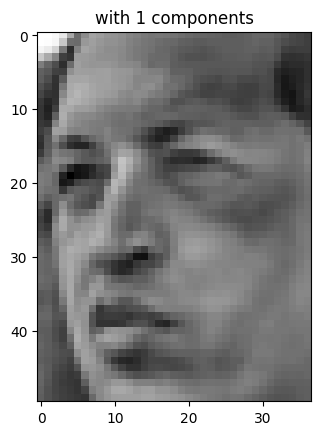

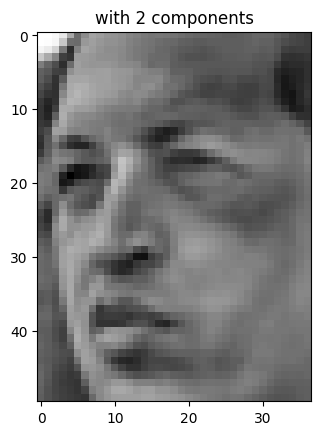

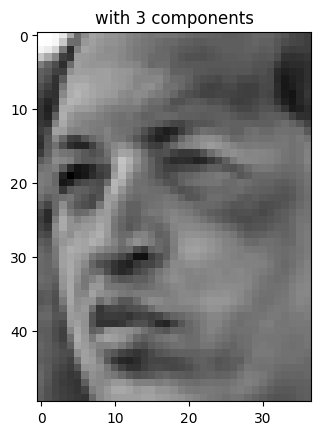

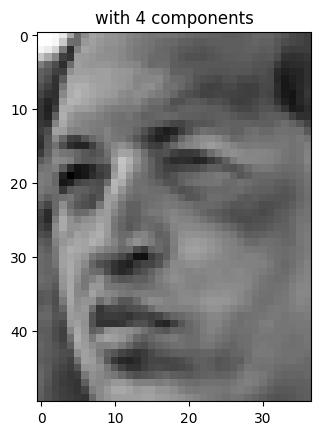

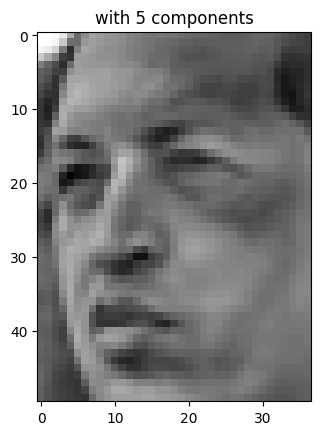

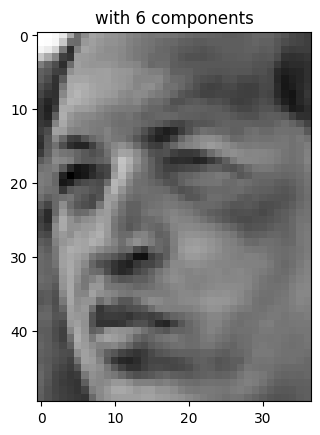

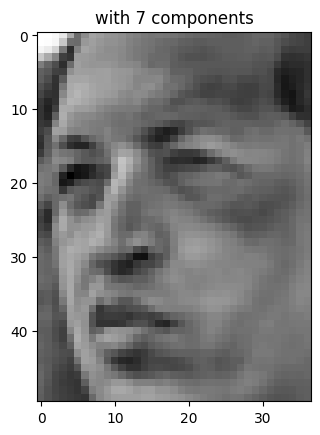

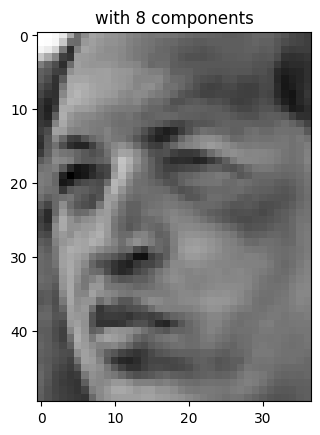

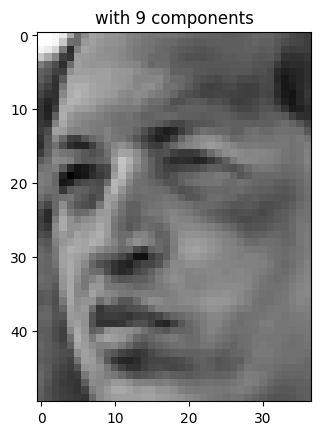

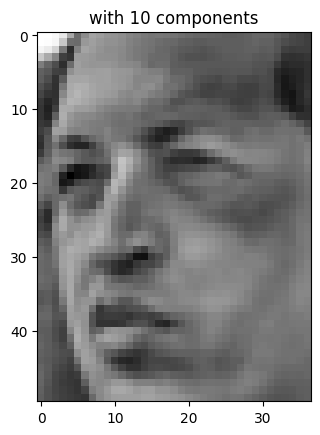

In [17]:
for k in range(1,11):
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=k))
    ])
    pipe.fit(X_train)
    plt.imshow(X_tr[0].reshape((50,37)), cmap=plt.cm.gray)
    plt.title(f"with {k} components")
    plt.show()

In [33]:
f1_scores = []
for k in range(1,11):
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=k)),
    ('clf', LogisticRegression())
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1_score_ = f1_score(y_test, y_pred, average='micro')
    f1_scores.append(f1_score_)
print(list(zip(range(1,11),np.round(f1_scores,7))))

[(1, 0.4378882), (2, 0.431677), (3, 0.4409938), (4, 0.4440994), (5, 0.4409938), (6, 0.4720497), (7, 0.4751553), (8, 0.4689441), (9, 0.4968944), (10, 0.5124224)]


 **Step 9: Plot  the graph for  F1 score vs  diffrent number of  compnents (1 to 10).**

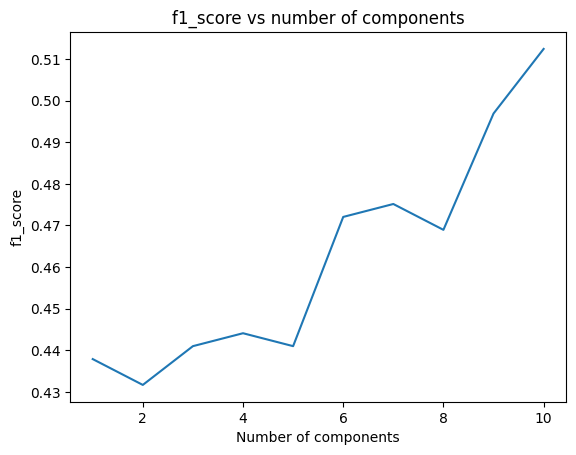

In [34]:
plt.plot(np.arange(1,11), f1_scores)
plt.title(f"f1_score vs number of components")
plt.xlabel("Number of components")
plt.ylabel("f1_score")
plt.show()